******NLTK 자연어 처리 패키지******

NLTK 패키지가 제공하는 주요 기능은 다음과 같다.


**말뭉치**

**토큰 생성**

**형태소 분석**

**품사 태깅**

1. <h5>말뭉치 - Corpus<h5> 

*자연어 분석 작업을 위해 만든 샘플 문서 집합.

*NLTK 패키지의 corpus 서브패키지에서는 다양한 연구용 말뭉치를 제공한다.

*nltk.download("book") 명령을 실행하면 NLTK 패키지 사용자 설명서에서 요구하는 대부분의 말뭉치를 다운로드 받아준다.

In [1]:
import nltk
nltk.download("book", quiet=True)
from nltk.book import *
import matplotlib.pyplot as plt

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

**gutenberg 말뭉치에는 포함되고 있는 작품 샘플 중에 제인 오스틴의 엠마 문서를 살펴보면 다음과 같이 원문 형태 그대로를 포함하고 있다.**

In [26]:
emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
print(emma_raw[:1302])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

**토큰 생성**

문자열 작은 단위 = 토큰

문자열을 토큰으로 나누는 작업 = 토큰 생성(tokenizing)

In [4]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emma_raw[:1000])[3])

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.


In [5]:
from nltk.tokenize import word_tokenize
word_tokenize(emma_raw[50:100])

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a']

In [6]:
from nltk.tokenize import RegexpTokenizer 
retokenize = RegexpTokenizer("[\w]+")
retokenize.tokenize(emma_raw[50:100])

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

<h5>형태소 분석<h5>

1.**어간 추출(stemming)**  (e.g.PorterStemmer, LancasterStemmer)

2.**원형 복원(lemmatizing)** (e.g. WordNetLemmatizer)

3.**품사 부착(Part-Of-Speech tagging)** (e.g. pos_tag)

1. **어간 추출(stemming)은** 변화된 단어의 접미사나 어미를 제거하여 같은 의미를 가지는 형태소의 기본형을 찾는 방법이다.

In [28]:
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 =  LancasterStemmer()

words = ["fly", "flies", "flying", "flew", "flown"]

words2 = ["running","runs","ran","runner","runnable", "runnings", "runner's","runners","runneth","runnability"]

print("Porter Stemmer1   :", [st1.stem(w) for w in words])
print("Lancaster Stemmer1:", [st2.stem(w) for w in words])

print("Porter Stemmer2   :", [st1.stem(w) for w in words2])
print("Lancaster Stemmer2:", [st2.stem(w) for w in words2])

Porter Stemmer1   : ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster Stemmer1: ['fly', 'fli', 'fly', 'flew', 'flown']
Porter Stemmer2   : ['run', 'run', 'ran', 'runner', 'runnabl', 'run', "runner'", 'runner', 'runneth', 'runnabl']
Lancaster Stemmer2: ['run', 'run', 'ran', 'run', 'run', 'run', "runner's", 'run', 'runne', 'run']


2. **원형 복원(lemmatizing)은** 같은 의미를 가지는 여러 단어를 사전형으로 통일하는 작업이다

In [35]:
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()


words2 = ["amazing","amazes", "amazed","amazingly","amazement","amazingness", "amazingly","amazingly's","amazingest"]

[lm.lemmatize(w, pos="a") for w in words2]
 
#품사(part of speech)를 지정하는 경우 좀 더 정확한 원형을 찾을 수 있다. e.g. pos="v"

['exciting',
 'excites',
 'excited',
 'excitingly',
 'excitement',
 'excitable',
 'excitings',
 'excitably',
 'excitingness']

<h4>3.품사 부착<h4>
<h5>품사(POS, part-of-speech)는 낱말을 문법적인 기능이나 형태, 뜻에 따라 구분한 것이다.<h5>

**어간 추출과 원형 복원**

NLTK에서는 펜 트리뱅크 태그세트(Penn Treebank Tagset)을 사용한다.

**NNP:** 단수 고유명사

**VB:** 동사

**VBP:** 동사 현재형

**TO:** to 전치사

**NN:** 명사(단수형 혹은 집합형)

**DT:** 관형사

In [9]:
nltk.help.upenn_tagset("VB")

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


**pos_tag** 명령을 사용하면 단어 토큰에 품사를 부착하여 튜플로 출력한다.

In [36]:
from nltk.tag import pos_tag
sentence = "The quick brown fox jumps over the lazy dog. He saw a beautiful sunrise yesterday."
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('The', 'DT'),
 ('quick', 'JJ'),
 ('brown', 'NN'),
 ('fox', 'NN'),
 ('jumps', 'VBZ'),
 ('over', 'IN'),
 ('the', 'DT'),
 ('lazy', 'JJ'),
 ('dog', 'NN'),
 ('.', '.'),
 ('He', 'PRP'),
 ('saw', 'VBD'),
 ('a', 'DT'),
 ('beautiful', 'JJ'),
 ('sunrise', 'NN'),
 ('yesterday', 'NN'),
 ('.', '.')]

품사 태그 정보를 사용하면 **명사인** 토큰만 선택할 수 있다.

In [37]:
nouns_list = [t[0] for t in tagged_list if t[1] == "NN"]
nouns_list

['brown', 'fox', 'dog', 'sunrise', 'yesterday']

In [38]:
from nltk.tag import untag
untag(tagged_list)

['The',
 'quick',
 'brown',
 'fox',
 'jumps',
 'over',
 'the',
 'lazy',
 'dog',
 '.',
 'He',
 'saw',
 'a',
 'beautiful',
 'sunrise',
 'yesterday',
 '.']

In [39]:
def tokenizer(doc): 
    return ["/".join(p) for p in doc]

tokenizer(tagged_list)

['The/DT',
 'quick/JJ',
 'brown/NN',
 'fox/NN',
 'jumps/VBZ',
 'over/IN',
 'the/DT',
 'lazy/JJ',
 'dog/NN',
 './.',
 'He/PRP',
 'saw/VBD',
 'a/DT',
 'beautiful/JJ',
 'sunrise/NN',
 'yesterday/NN',
 './.']

<h4>Text 클래스<h4>

<h5>NLTK의 Text 클래스는 문서 분석에 유용한 여러가지 메서드를 제공한다. 토큰열을 입력하여 생성한다.<h5>

In [43]:
from nltk import Text

text_universe = '''
The universe is full of magical things, patiently waiting for our wits to grow sharper.
In the midst of chaos, there is also opportunity.
Life is a series of natural and spontaneous changes. Don't resist them; that only creates sorrow. Let reality be reality.
Happiness can be found even in the darkest of times if one only remembers to turn on the light.
The future belongs to those who believe in the beauty of their dreams.
'''
text2 = Text(retokenize.tokenize(text_universe))

**plot** 메소드를 사용하면 각 단어(토큰)의 **사용 빈도를** 그래프로 그려준다.

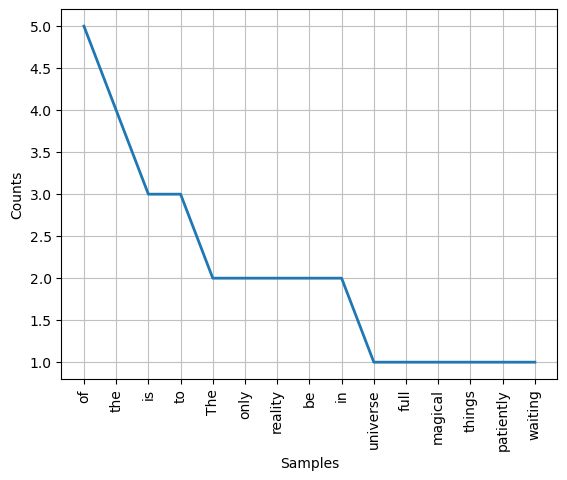

In [44]:
text2.plot(15) #15 = the number of words that we want to see the frequency of. Top 15 words' frequency graph.
plt.show()

**dispersion_plot** 메서드는 단어가 사용된 위치를 시각화한다. 소설 엠마의 각 등장인물에 대해 적용하면 다음과 같은 결과를 얻는다.

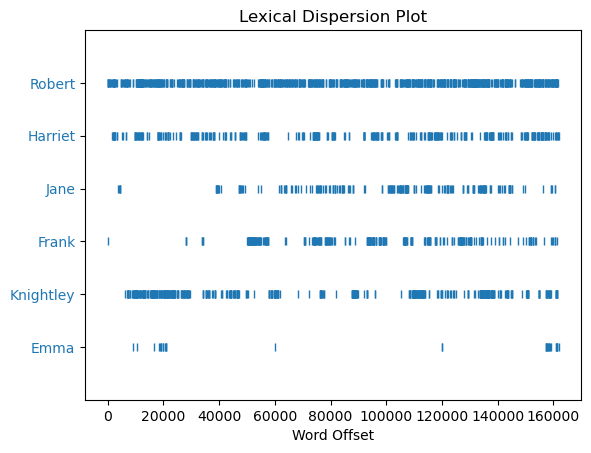

In [47]:
text = Text(retokenize.tokenize(emma_raw))
text.dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

**concordance** 메서드로 단어가 사용된 위치를 직접 표시하면 문맥(context)이 어떤지 볼 수 있다.

In [17]:
text.concordance("Knightley")

Displaying 25 of 389 matches:
lked in and made it unnecessary Mr Knightley a sensible man about seven or eigh
ated Mr Woodhouse for some time Mr Knightley had a cheerful manner which always
observed It is very kind of you Mr Knightley to come out at this late hour to c
k I could mean _you_ or suppose Mr Knightley to mean _you_ What a horrible idea
 idea Oh no I meant only myself Mr Knightley loves to find fault with me you kn
say what we like to one another Mr Knightley in fact was one of the few people 
 knows I never flatter her said Mr Knightley but I meant no reflection on any b
ing so well said her father But Mr Knightley she is really very sorry to lose p
 not miss such a companion said Mr Knightley We should not like her so well as 
in may comfort me for any thing Mr Knightley shook his head at her Her father f
d what you mean by success said Mr Knightley Success supposes endeavour Your ti
 a much better thing I dare say Mr Knightley will be so kind as to meet him Wit
f pleasure

**similar** 메서드는 같은 문맥에서 주어진 단어 대신 사용된 횟수가 높은 단어들을 찾는다.

In [48]:
text.similar("Knightley")

elton weston woodhouse martin perry churchill cole dixon e suckling
goddard knightleys i her is you wingfield sister but they


In [50]:
text.common_contexts(["Knightley", "weston"])

mr_s mr_and mr_i mr_was mr_had mr_to mr_she mr_but mr_is mr_who
mr_could mr_he mr_with mr_would mr_must mr_in mr_that mr_it mr_as
mr_will


**FreqDist**


**FreqDist** 클래스는 문서에 사용된 단어(토큰)의 사용빈도 정보를 담는 클래스이다. Text 클래스의 vocab 메서드로 추출할 수 있다.

In [51]:
fd = text.vocab()
type(fd)

nltk.probability.FreqDist

다음 코드에서 Emma 말뭉치에서 사람의 이름만 모아서 FreqDist 클래스 객체를 만들었습니다. 

품사 태그에서 NNP(고유대명사)이면서 필요없는 단어(stop words)는 제거했습니다.

In [52]:
from nltk import FreqDist

stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]
emma_tokens = pos_tag(retokenize.tokenize(emma_raw))
names_list = [t[0] for t in emma_tokens if t[1] == "NNP" and t[0] not in stopwords]
fd_names = FreqDist(names_list)
#NNP = 고유명사

In [53]:
fd_names.N(), fd_names["Knightley"], fd_names.freq("Knightley")

(7863, 389, 0.04947221162406206)

**most_common** 메서드를 사용하면 가장 출현 횟수가 높은 단어를 찾는다.

In [54]:
fd_names.most_common(7)

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385),
 ('Woodhouse', 304),
 ('Jane', 299)]

**워드클라우드**

**wordcloud** 패키지를 사용하면 단어의 사용 빈도수에 따라 워드클라우드(Word Cloud) 시각화를 할 수 있다.

In [24]:
!pip install wordcloud

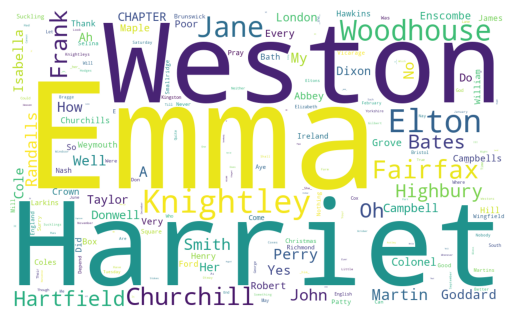

In [25]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis("off")
plt.show()